### Importing important Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

### Importing the Dataset

In [2]:
df=pd.read_csv('insurance.csv')

### Looking at the top 5 records

In [3]:
df.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


### Looking at the Shape of the Dataset

In [4]:
print('Number of rows in the dataset',df.shape[0])
print('Number of columns in the dataset',df.shape[1])

Number of rows in the dataset 986
Number of columns in the dataset 11


### Information of the Dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


Observation:

* There are 11 colummns and 986 records
    
* Data type for all the Variables are integer but **Diabetes**, **BloodPressureProblems**, **AnyTransplants**,    **AnyChronicDiseases**, **KnownAllergies**, **HistoryOfCancerInFamily**, **NumberOfMajorSurgeries** are Actualy object variables

In [6]:
#Updating the  datatype for object variable

for i in df[['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']] :
     df[i]=df[i].astype('object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      986 non-null    int64 
 1   Diabetes                 986 non-null    object
 2   BloodPressureProblems    986 non-null    object
 3   AnyTransplants           986 non-null    object
 4   AnyChronicDiseases       986 non-null    object
 5   Height                   986 non-null    int64 
 6   Weight                   986 non-null    int64 
 7   KnownAllergies           986 non-null    object
 8   HistoryOfCancerInFamily  986 non-null    object
 9   NumberOfMajorSurgeries   986 non-null    object
 10  PremiumPrice             986 non-null    int64 
dtypes: int64(4), object(7)
memory usage: 84.9+ KB


### Checking for Null Values

In [8]:
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

### Checking for Duplicate values

In [9]:
dups=df.duplicated()
print('Number of duplicate records',dups.sum())

Number of duplicate records 0


In [10]:
# Seprating the object and numeric variable
cat = []
num = []
for i in df.columns:
    if df[i].dtype=='object':
        cat.append(i)
    else:
        num.append(i)

In [11]:
num

['Age', 'Height', 'Weight', 'PremiumPrice']

In [12]:
cat

['Diabetes',
 'BloodPressureProblems',
 'AnyTransplants',
 'AnyChronicDiseases',
 'KnownAllergies',
 'HistoryOfCancerInFamily',
 'NumberOfMajorSurgeries']

#### Summary of Numeric Data

In [13]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,986.0,41.745436,13.963371,18.0,30.0,42.0,53.0,66.0
Height,986.0,168.182556,10.098155,145.0,161.0,168.0,176.0,188.0
Weight,986.0,76.950304,14.265096,51.0,67.0,75.0,87.0,132.0
PremiumPrice,986.0,24336.713996,6248.184382,15000.0,21000.0,23000.0,28000.0,40000.0


#### Observations:
    1. Minimum Age of  User is 18 years and Maximum Age is 66  years where Average Age is 42 years
    2. Minimum Height of the User 145 and Maximum  Height is 188 and Average Height is 168.
    3. Minimum Weight  of the User 51 and Maximum  Weight is 132 and Average Weight is 77.
    4. Minimum Premium Price  that User Pays is 15000 and Maximum Premium Price is 40000 while the Average Premium price is 24337.We observe that the Standard deviation is very large for Premium Price.

#### Summary of Object Data

In [14]:
df[cat].describe().T

,count,unique,top,freq
Diabetes,986,2,0,572
BloodPressureProblems,986,2,0,524
AnyTransplants,986,2,0,931
AnyChronicDiseases,986,2,0,808
KnownAllergies,986,2,0,774
HistoryOfCancerInFamily,986,2,0,870
NumberOfMajorSurgeries,986,4,0,479


### Looking at the Unique values.

In [15]:
for i in df[cat]:
    print(i ,df[i].nunique())
    print(df[i].value_counts())
    print('************************************************')

Diabetes 2
0    572
1    414
Name: Diabetes, dtype: int64
************************************************
BloodPressureProblems 2
0    524
1    462
Name: BloodPressureProblems, dtype: int64
************************************************
AnyTransplants 2
0    931
1     55
Name: AnyTransplants, dtype: int64
************************************************
AnyChronicDiseases 2
0    808
1    178
Name: AnyChronicDiseases, dtype: int64
************************************************
KnownAllergies 2
0    774
1    212
Name: KnownAllergies, dtype: int64
************************************************
HistoryOfCancerInFamily 2
0    870
1    116
Name: HistoryOfCancerInFamily, dtype: int64
************************************************
NumberOfMajorSurgeries 4
0    479
1    372
2    119
3     16
Name: NumberOfMajorSurgeries, dtype: int64
************************************************


### Checking for Outliers

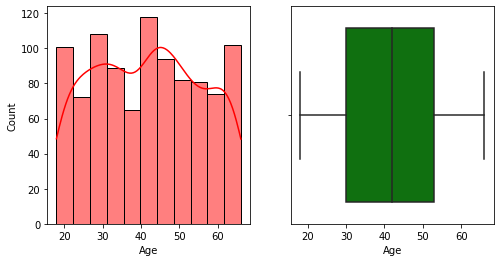

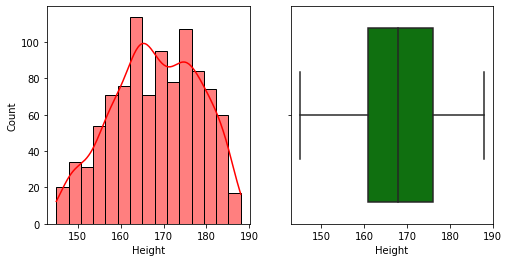

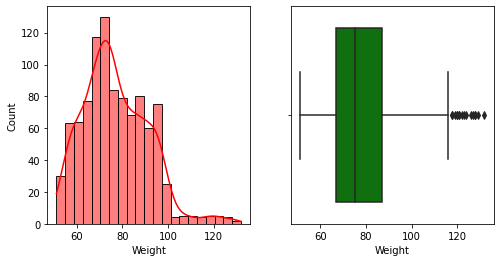

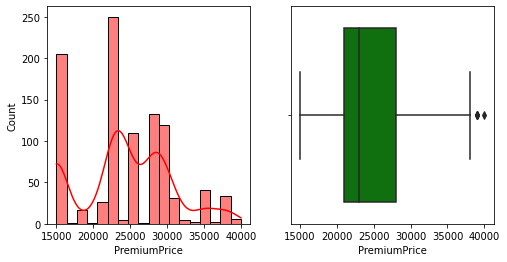

In [16]:
for i in df[num]:
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(8,4))
    sns.histplot(df[i],kde=True,ax=axes[0],color='red')
    sns.boxplot(df[i],ax=axes[1],color='green')

### Univariate Analysis

Text(0.5, 1.0, 'Distribution of Weight of users')

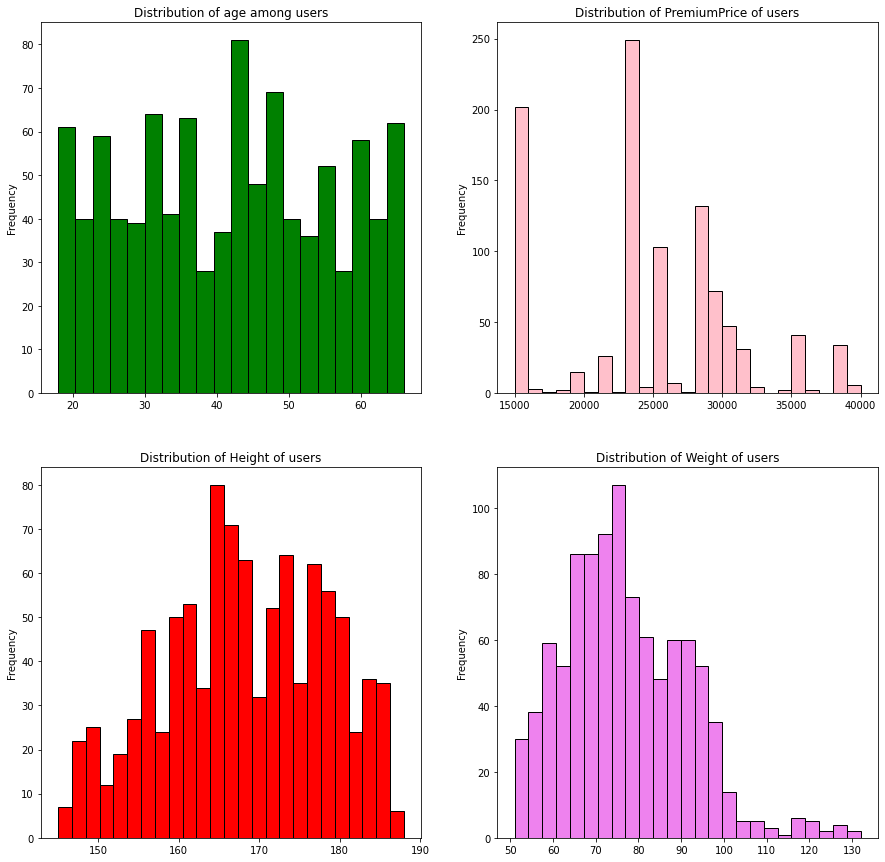

In [17]:
f,ax=plt.subplots(2,2,figsize=(15,15))
df.Age.plot.hist(bins = 20, edgecolor = 'black',color = 'green',ax=ax[0][0])
ax[0][0].set_title('Distribution of age among users')

df.PremiumPrice.plot.hist(bins = 25, edgecolor = 'black',color = 'pink',ax=ax[0][1])
ax[0][1].set_title('Distribution of PremiumPrice of users')

df.Height.plot.hist(bins = 25, edgecolor = 'black',color = 'red',ax=ax[1][0])
ax[1][0].set_title('Distribution of Height of users')

df.Weight.plot.hist(bins = 25, edgecolor = 'black',color = 'violet',ax=ax[1][1])
ax[1][1].set_title('Distribution of Weight of users')


In [18]:
print('Distribution of Age')
print('Oldest User was of:',round(df['Age'].max()),'Years')
print('Youngest User was of:',round(df['Age'].min()),'Years')
print('Average Use age:',round(df['Age'].mean()),'Years')
print('**************************************************')

print('Distribution of Premium Price')
print('lowest Premium of a User was of:',round(df['PremiumPrice'].max()))
print('Youngest User was of:',round(df['PremiumPrice'].min()))
print('Average User Premium Price:',round(df['PremiumPrice'].mean()))
print('**************************************************')

print('Distribution of Height')
print('shortest Height of a User was of:',round(df['Height'].max()))
print('tallest User was of:',round(df['Height'].min()))
print('Average Height of  User:',round(df['Height'].mean()))
print('**************************************************')



Distribution of Age
Oldest User was of: 66 Years
Youngest User was of: 18 Years
Average Use age: 42 Years
**************************************************
Distribution of Premium Price
lowest Premium of a User was of: 40000
Youngest User was of: 15000
Average User Premium Price: 24337
**************************************************
Distribution of Height
shortest Height of a User was of: 188
tallest User was of: 145
Average Height of  User: 168
**************************************************


<AxesSubplot:ylabel='NumberOfMajorSurgeries'>

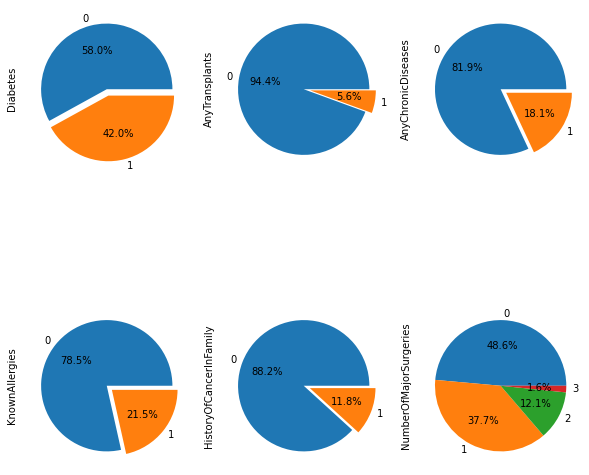

In [19]:
f,ax=plt.subplots(2,3,figsize=(10,10))
df['Diabetes'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0][0])
df['AnyTransplants'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0][1])
df['AnyChronicDiseases'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0][2])
df['KnownAllergies'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1][0])
df['HistoryOfCancerInFamily'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1][1])
df['NumberOfMajorSurgeries'].value_counts().plot.pie(explode=[0,0,0,0],autopct='%1.1f%%',ax=ax[1][2])

### Multivariate Analysis

#### Relation between Age and Premium Price.

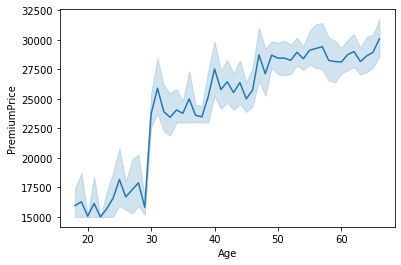

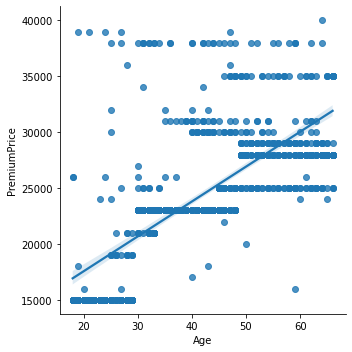

In [20]:
sns.lineplot(df['Age'],df['PremiumPrice'])
sns.lmplot(x='Age', y ='PremiumPrice',data=df)

In [21]:
print('Oldest User was of:',round(df['Age'].max()),'Years')
print('Youngest User was of:',round(df['Age'].min()),'Years')
print('Average User age:',round(df['Age'].mean()),'Years')

Oldest User was of: 66 Years
Youngest User was of: 18 Years
Average User age: 42 Years


#### Observation:

As Age increases Premium also increases

The same can be confirmed from the lm plot that there is positive relation between the Age and Premium Price.

Also observe some Anomalies which might be due to some other factors.

With age as it is believed that with the rising age, chances of health problems also rise and that’s why accordingly the premium amount also increases.

#### Relation between Weight and Premium Price.

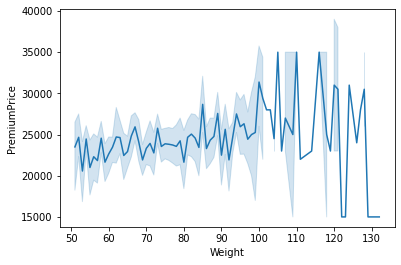

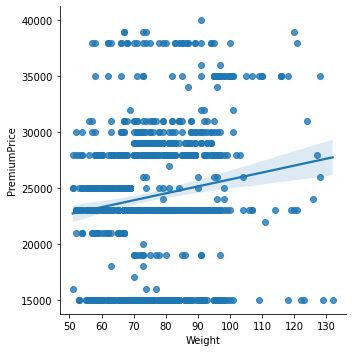

In [22]:
sns.lineplot(df['Weight'],df['PremiumPrice'])
sns.lmplot(x='Weight', y ='PremiumPrice',data=df)

#### Observations:

Life insurance rates are typically higher if you're overweight or obese, since insurers take into account your weight and height when setting premiums.We Observe that the Premium really fluctuates with weight as we observe some Users with lot of weight pay high premium but also there are Users with lot of weight but are paying less premium.

Overall looking at the regression plot we can say that there is some positive relation between the Premium Price and Weight. If we have more data we might get to see a clearer picture.

or there might be some other factors influencing the abnormity.

As per the Industry Trends Premium Prices are typically higher if you're overweight or obese, since insurers take into account your weight and height when setting premiums.

#### Relation between Height and Premium Price.

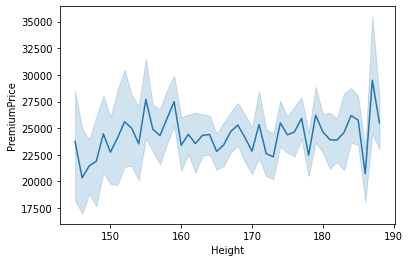

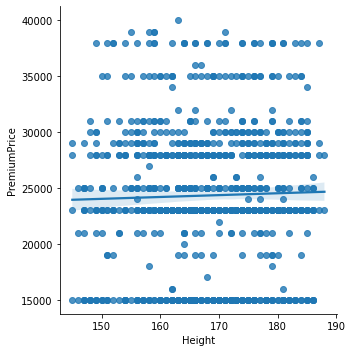

In [23]:
sns.lineplot(df['Height'],df['PremiumPrice'])
sns.lmplot(x='Height', y ='PremiumPrice',data=df)

#### Observation:

Although we observe that there is very litte to no relation between Height and Premium the litter relation might be because Height is a factor in BMI calculation and BMI is consider while setting Premiums

#### Relation between Number Of Major Surgeries and Premium Price

<AxesSubplot:xlabel='NumberOfMajorSurgeries', ylabel='PremiumPrice'>

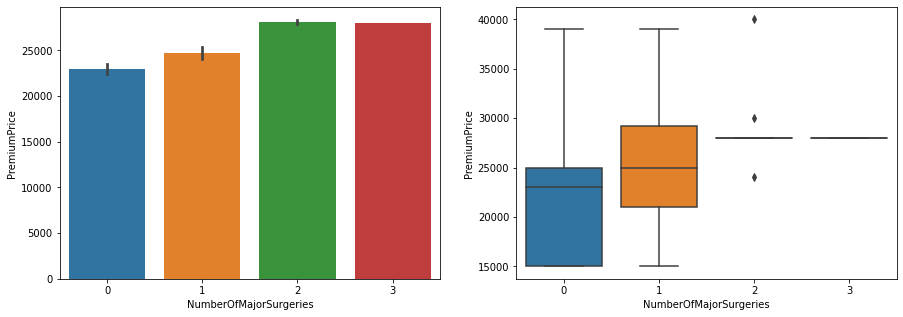

In [24]:
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.barplot(data = df, x='NumberOfMajorSurgeries',y='PremiumPrice',ax=ax[0])
sns.boxplot(data = df, x='NumberOfMajorSurgeries',y='PremiumPrice',ax=ax[1])

#### Observation:

As the Number of Surgeries increases Premium Price also increases Although the difference is not Significant

#### Relation between History Of Cancer In Family and Premium Price.

<AxesSubplot:xlabel='HistoryOfCancerInFamily', ylabel='PremiumPrice'>

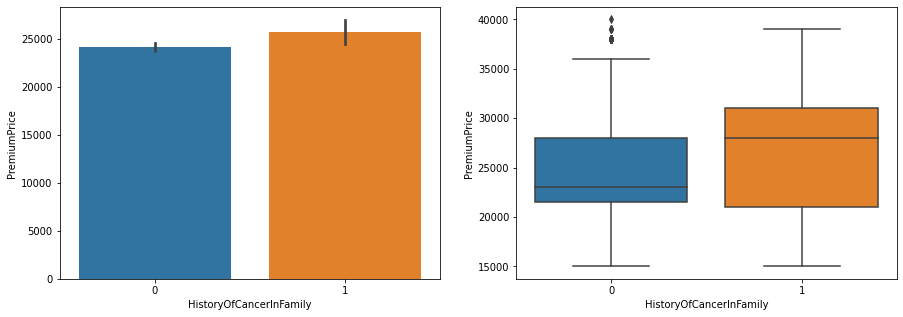

In [25]:
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.barplot(data = df, x='HistoryOfCancerInFamily',y='PremiumPrice',ax=ax[0])
sns.boxplot(data = df, x='HistoryOfCancerInFamily',y='PremiumPrice',ax=ax[1])

#### Observation:

Users with History of Cancer in Family tend to pay higher Premium Price than the Users who don't.

#### Relation between Known Allergies In Family and Premium Price.

<AxesSubplot:xlabel='KnownAllergies', ylabel='PremiumPrice'>

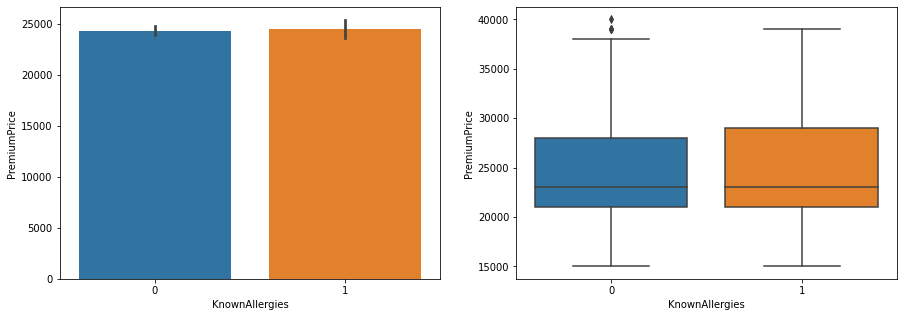

In [26]:
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.barplot(data = df, x='KnownAllergies',y='PremiumPrice',ax=ax[0])
sns.boxplot(data = df, x='KnownAllergies',y='PremiumPrice',ax=ax[1])

#### Observation:

We observe that there is not Much difference in the Premium Price with respect to Users with Known Allergies or NO Allergies.

#### Relation between Any Chronic Diseases In Family and Premium Price.

<AxesSubplot:xlabel='AnyChronicDiseases', ylabel='PremiumPrice'>

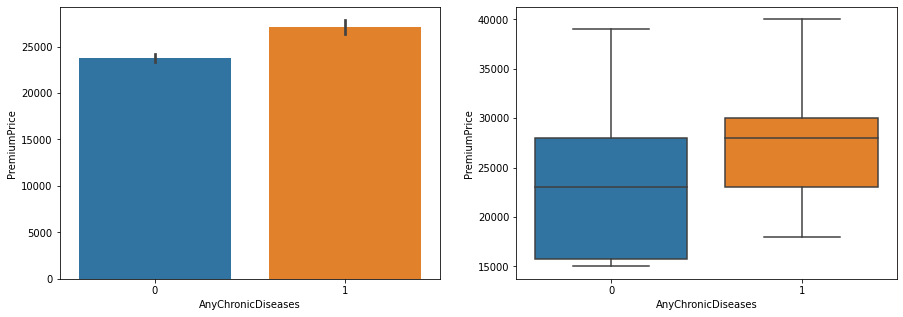

In [27]:
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.barplot(data = df, x='AnyChronicDiseases',y='PremiumPrice',ax=ax[0])
sns.boxplot(data = df, x='AnyChronicDiseases',y='PremiumPrice',ax=ax[1])

#### Observations:

We Observe that Users' with Any Chronic Diseases pau higher Premium Price.

#### Relation between Any Transplants In Family and Premium Price.

<AxesSubplot:xlabel='AnyTransplants', ylabel='PremiumPrice'>

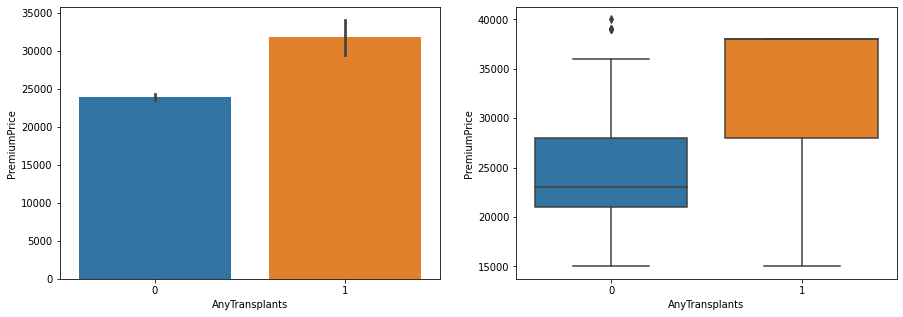

In [28]:
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.barplot(data = df, x='AnyTransplants',y='PremiumPrice',ax=ax[0])
sns.boxplot(data = df, x='AnyTransplants',y='PremiumPrice',ax=ax[1])

#### Observation:

Users' with Any Transplant Pay Higer Premium Price.

#### Relation between Diabetes In Family and Premium Price.

<AxesSubplot:xlabel='Diabetes', ylabel='PremiumPrice'>

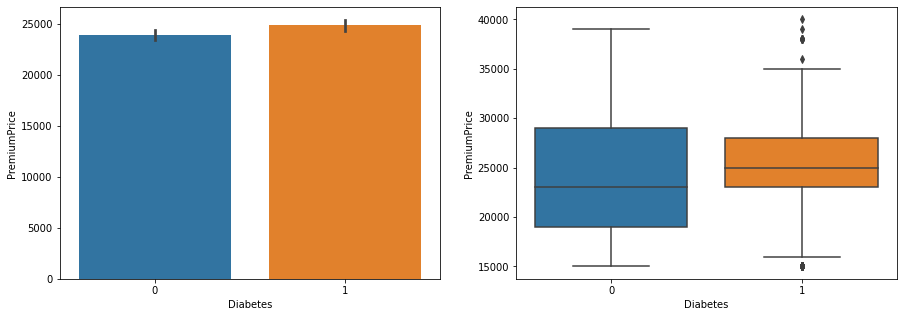

In [29]:
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.barplot(data = df, x='Diabetes',y='PremiumPrice',ax=ax[0])
sns.boxplot(data = df, x='Diabetes',y='PremiumPrice',ax=ax[1])

#### Observation:

We Observe that median Premium Price for  Users' with Diabetes  his Higher than Users' without Diabetes But, There are also Users' without Diabetes Pay Much Higher Premium.

#### Relation between Blood Pressure Problems In Family and Premium Price.

<AxesSubplot:xlabel='BloodPressureProblems', ylabel='PremiumPrice'>

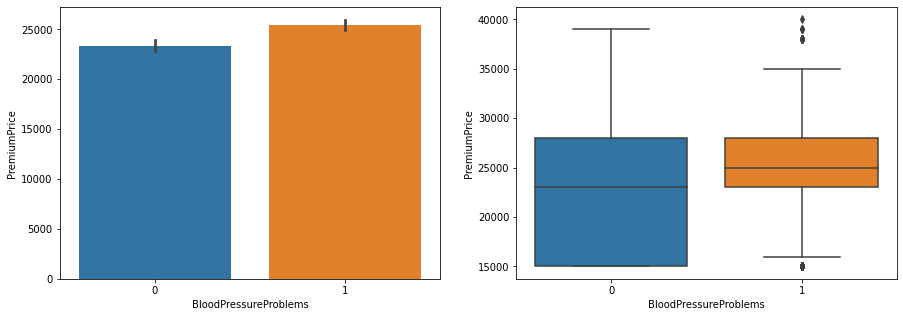

In [30]:
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.barplot(data = df, x='BloodPressureProblems',y='PremiumPrice',ax=ax[0])
sns.boxplot(data = df, x='BloodPressureProblems',y='PremiumPrice',ax=ax[1])

#### Observation:

We Observe that median Premium Price for  Users' with Blood Pressure Problems  his Higher than Users' without Blood Pressure Problems But, There are also Users' without Blood Pressure Problems Pay Much Higher Premium.

#### Analyze the Premium Price by age according to the History Of Cancer In Family.

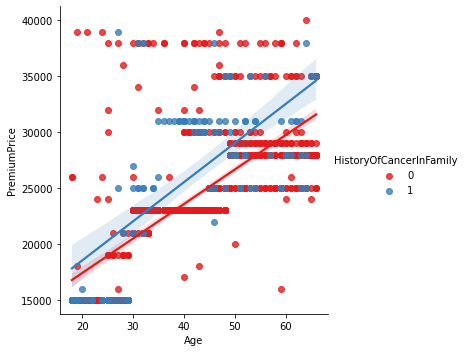

In [31]:
sns.lmplot(x = 'Age', y = 'PremiumPrice', data=df, hue='HistoryOfCancerInFamily', palette='Set1')

#### Observation:

1. With increase in Age Users' with History of Cancer in Family Pay higher than Users' with no History of Cancer in Family.

2. The difference in the Premium Price for Younger Users' with History of Cancer in Family and the Users' Without is much lower at Longer Age and bigger for Older Users'

#### Analyze the Premium Price by age according to the Diabetes.

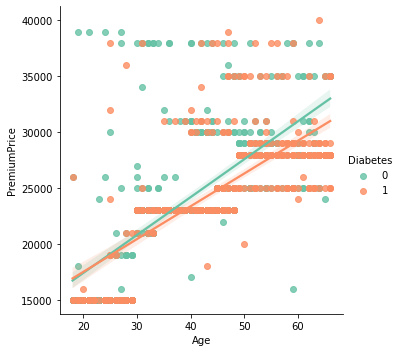

In [32]:
sns.lmplot(x = 'Age', y = 'PremiumPrice', data=df, hue='Diabetes', palette='Set2')

#### Observation:

1. We Observe that for Younger Users' there is not much difference in Premium  Price for the users with Diabetes and Without Diabetes.

2. With increase in Age Users' with Diabetes Pay Overall Lower Premium  than Users' with no Diabetes.

#### Analyze the Premium Price by age according to the Any Transplants.

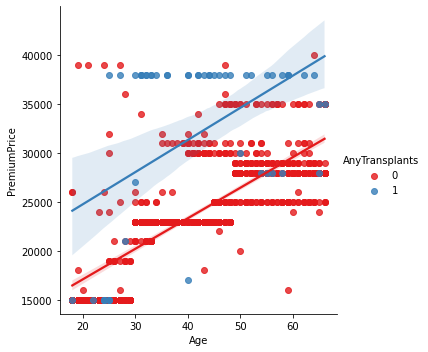

In [33]:
sns.lmplot(x = 'Age', y = 'PremiumPrice', data=df, hue='AnyTransplants', palette='Set1')

#### Observation:

Users' with Any Transplant pay higher Premium Price for any age.

#### Analyze the Premium Price by age according to the Any Any Chronic Diseases.

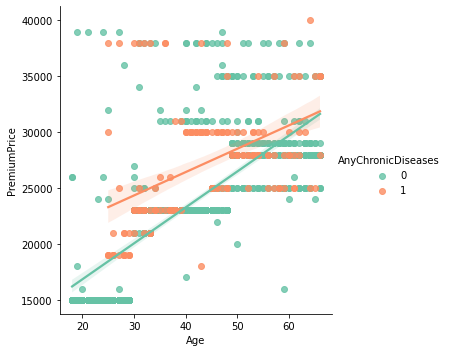

In [34]:
sns.lmplot(x = 'Age', y = 'PremiumPrice', data=df, hue='AnyChronicDiseases', palette='Set2')

#### Observation:

1. Users with Any Chronic Disease pay higher Premium Price than Users' with no  Chronic Disease.

2. Younger Users with Chronic Disease pay much higher than younger Users with No Chronic as compared to Older Users' with and Without Any Chronic Disease.

#### Analyze the Premium Price by age according to the Any Known Allergies.

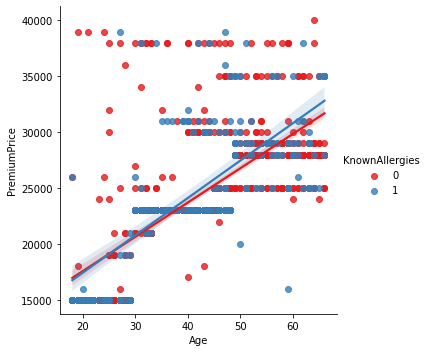

In [35]:
sns.lmplot(x = 'Age', y = 'PremiumPrice', data=df, hue='KnownAllergies', palette='Set1')

#### Observation:

1. We Observe that for Younger Users' there is not much differnce in Premium  Price for the users with Known Allergies and with no Known Allergies.

2. With increase in Age Users' with Known Allergies Pay Overall Lower Premium  than Users' with no Known Allergies.

#### Analyze the Premium Price by age according to the Number Of Major Surgeries.

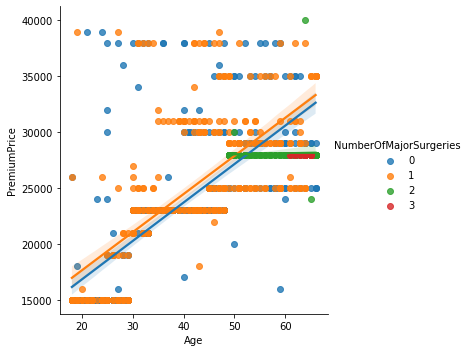

In [36]:
sns.lmplot(x = 'Age', y = 'PremiumPrice', data=df, hue='NumberOfMajorSurgeries')

#### Observation:
We Observe that the Number of Users' with 2/3 major Surgeries are very few and they tend to be older and also pay higher Premium Price., thus we can conclude the Positive relation.


#### Analyze the Premium Price by age according to the Blood Pressure Problems.

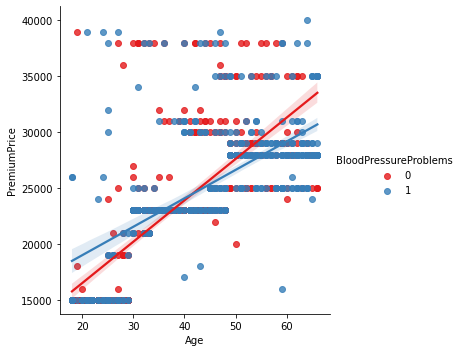

In [37]:
sns.lmplot(x = 'Age', y = 'PremiumPrice', data=df, hue='BloodPressureProblems', palette='Set1')

#### Observation:

1. We Observe that for Younger Users' there is much differnce in Premium  Price for the users with Blood Pressure Problems and with no Known Allergies.

2. With increase in Age Users' with Blood Pressure Problems Pay Overall Lower Premium  than Users' with no Blood Pressure Problems.

### Pair Plot and Correlation Heatmap.

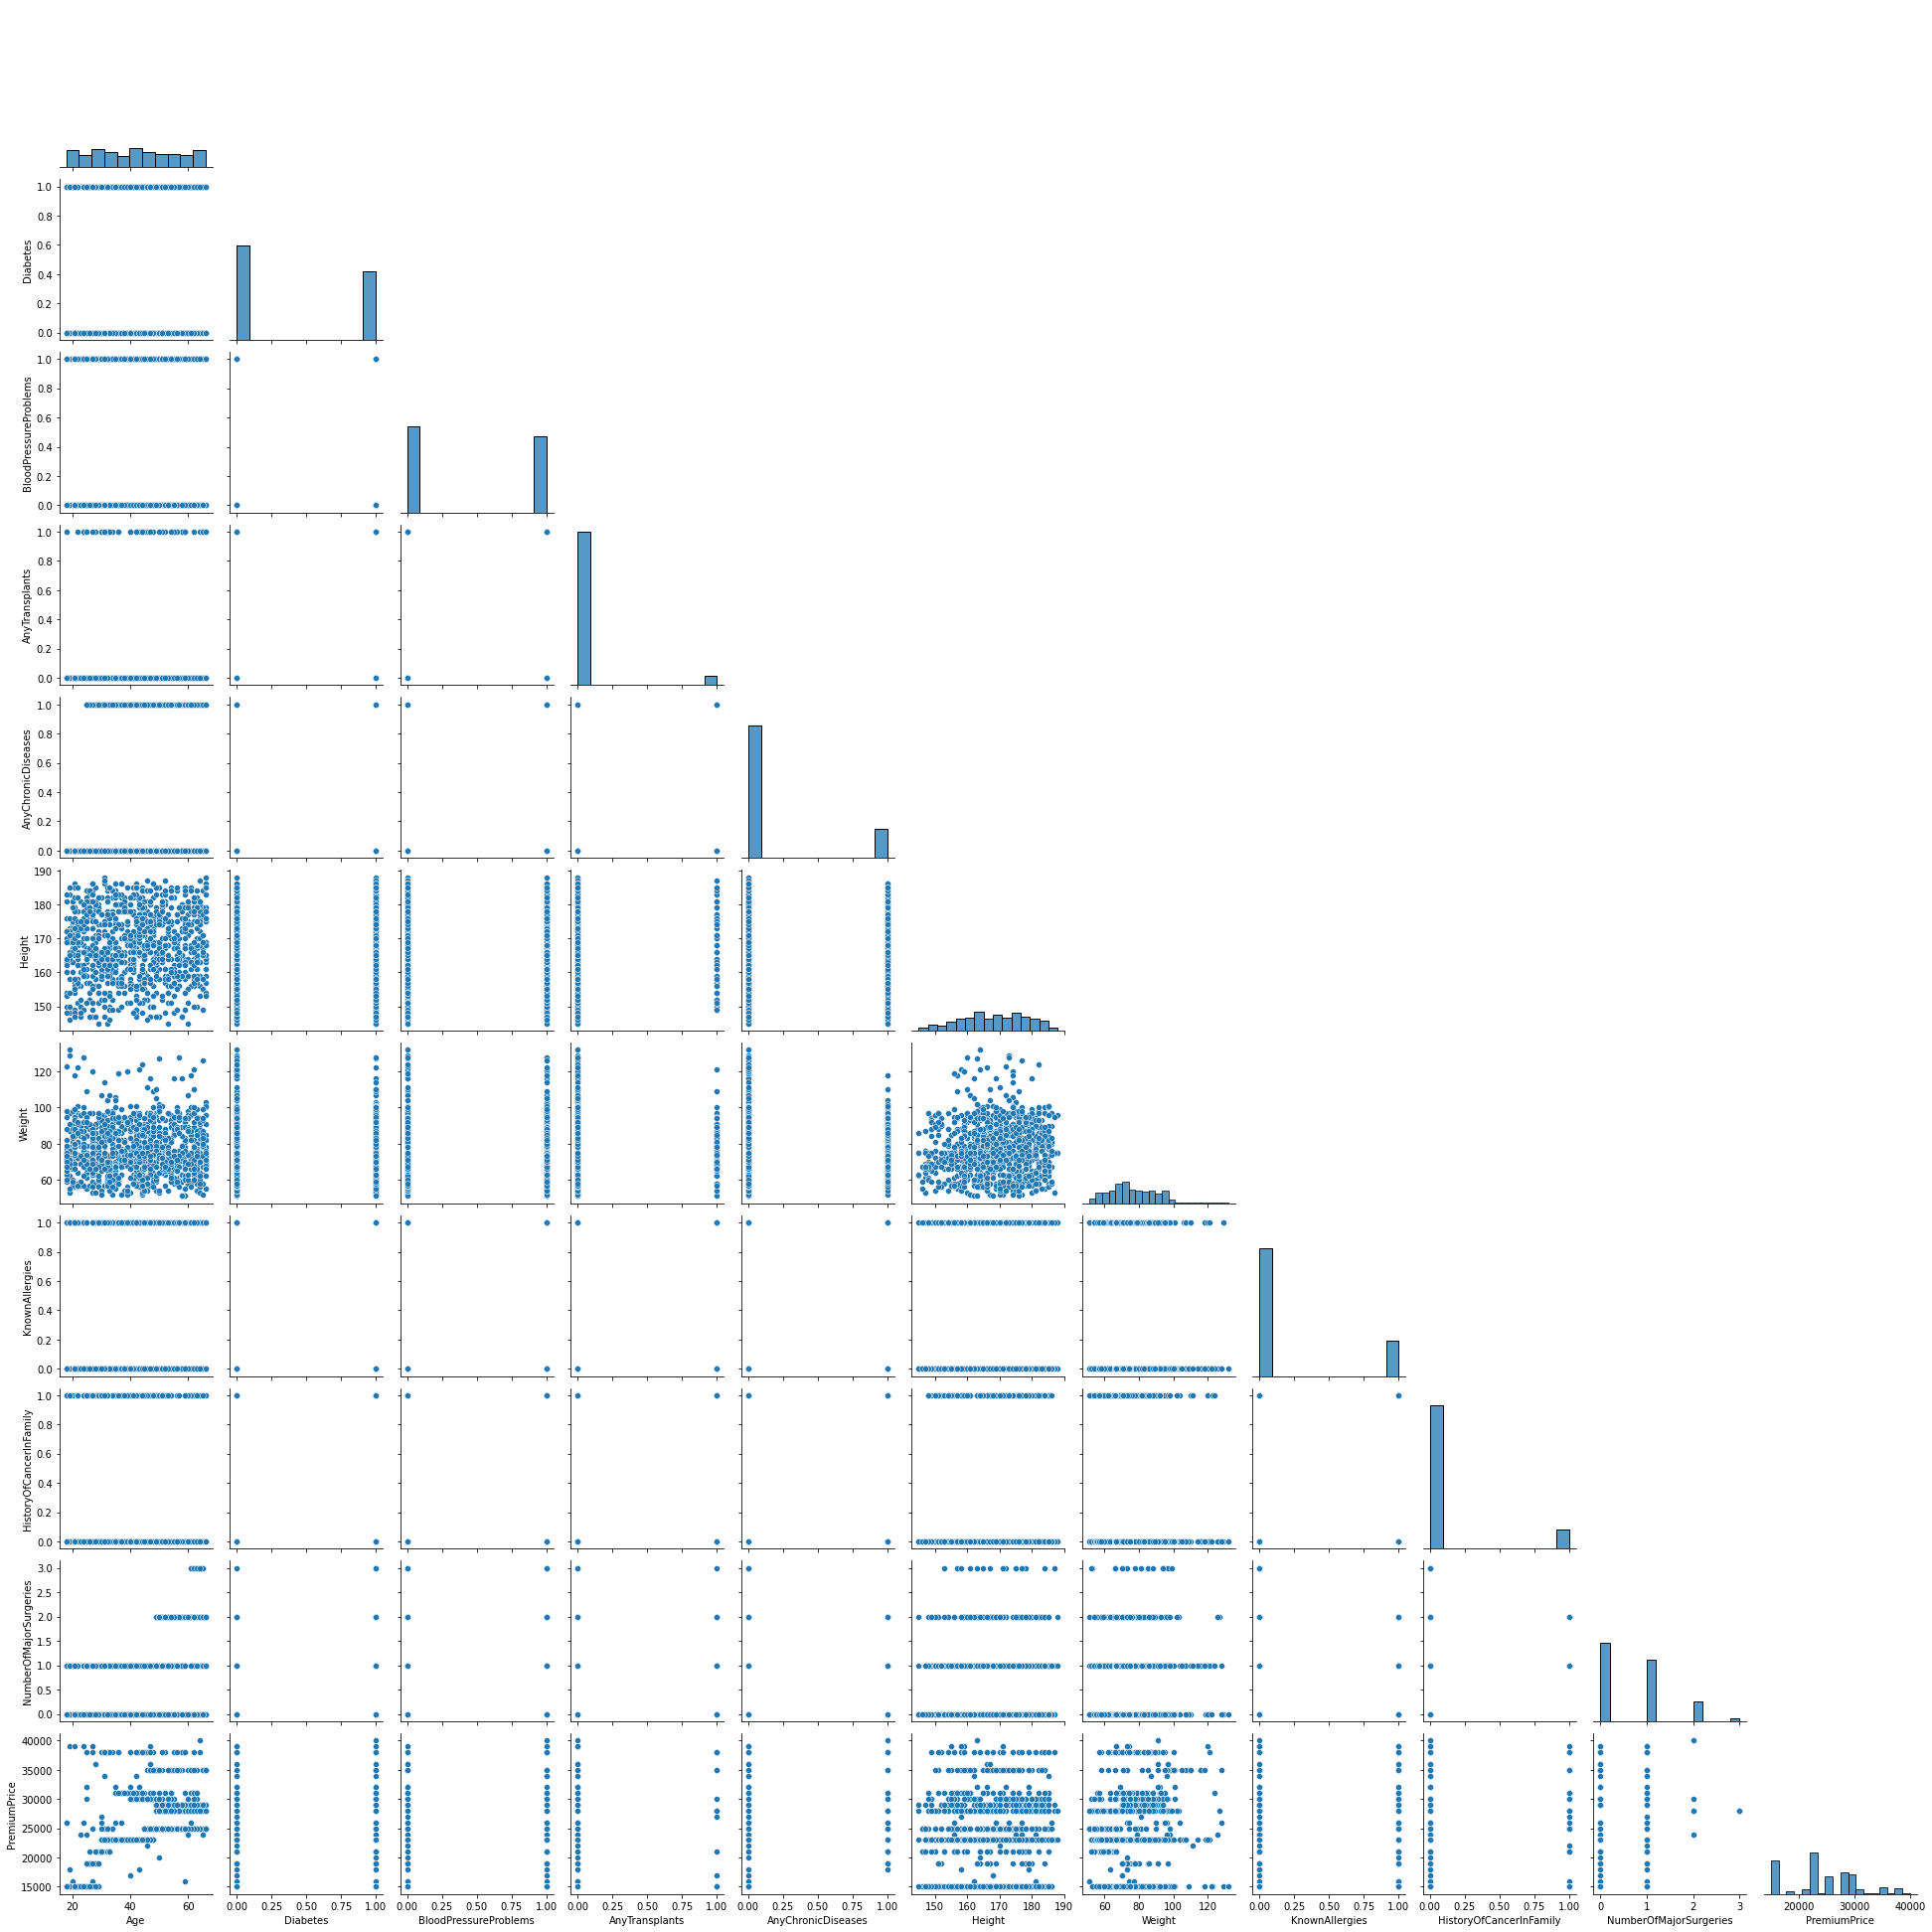

In [38]:
sns.pairplot(df,corner=True)

<AxesSubplot:>

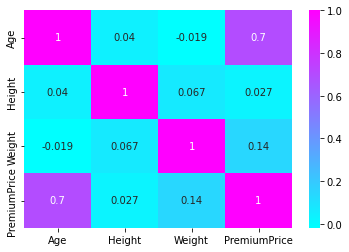

In [39]:
sns.heatmap(df.corr(),annot=True,cmap='cool')

#### Observation:
We Observe that there is strong correlation Between Age and Premium Price.

In [40]:
df.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

### Conclusion

Based on the above observation  factors that play an important role in determining the premium of the user are:
    
    1.  Age
    2.  AnyTransplants
    3.  AnyChronicDiseases
    4.  Weight:
    5.  HistoryOfCancerInFamily  
    6.  NumberOfMajorSurgeries
    7.  Height
   
We also Observe that below factors have insignificant or no Impact on the Premium Price:

     1. KnownAllergies
     2. BloodPressureProblems
     3. Diabetes
     

**HYPOTHESIS TESTING**

**Hypothesis 1:** The HistoryOfCancerInFamily affects  AnyChronicDiseases

Null Hypothesis (H0): The HistoryOfCancerInFamily has no effect on the  AnyChronicDiseases.

Alternative Hypothesis (H1): The HistoryOfCancerInFamily affects  AnyChronicDiseases.

In [41]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['HistoryOfCancerInFamily'], df['AnyChronicDiseases'])

print(contingency_table)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-square test statistic: {chi2}')
print(f'p-value: {p}')

AnyChronicDiseases         0    1
HistoryOfCancerInFamily          
0                        714  156
1                         94   22
Chi-square test statistic: 0.02062393388215223
p-value: 0.8858081638149811


#### Inference: 
The extremely high p-value (much higher than 0.05) suggests that there is NO statistically significant association between the History of Cancer In Family and Any Chronic Disease. 

**Hypothesis 2:** The Diabetes affects BloodPressure

Null Hypothesis (H0): The Diabetes has no effect on the BloodPressure.

Alternative Hypothesis (H1): The Diabetes affects BloodPressure.

In [42]:
# Create a contingency table
contingency_table = pd.crosstab(df['Diabetes'], df['BloodPressureProblems'])

print(contingency_table)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-square test statistic: {chi2}')
print(f'p-value: {p}')

BloodPressureProblems    0    1
Diabetes                       
0                      335  237
1                      189  225
Chi-square test statistic: 15.571225392078397
p-value: 7.945461025980538e-05


#### Inference:

The extremely low p-value (much less than 0.05) suggests that there is a statistically significant association between the Diabetes and Blood Pressure Problem.

## Modeling

### Dependent and Independent Features

In [43]:
X = df.drop('PremiumPrice',axis=1)
y = df.PremiumPrice

### Normalization

Normalization scales each input variable separately to the range 0-1

In [44]:
scalar =  StandardScaler()
X.Age = scalar.fit_transform(X[['Age']])
X.Height = scalar.fit_transform(X[['Height']])
X.Weight = scalar.fit_transform(X[['Weight']])

### Train Test Split

In [45]:
# Splitting the Dataset into 75 :25
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=43)

### Using Random Forest Regressor

In [46]:

#A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset
# and uses averaging to improve the predictive accuracy and control over-fitting

Lr=RandomForestRegressor(n_estimators= 50,max_depth=5)
Lr_model=Lr.fit(X_train,y_train)

In [47]:
print('Accuracy of the model on training Dataset ',Lr_model.score(X_train,y_train))
print ('Accuracy of the model on Test Dataset ',Lr_model.score(X_test,y_test))

Accuracy of the model on training Dataset  0.8521505683020538
Accuracy of the model on Test Dataset  0.8063144502660446


### Finding Important Features

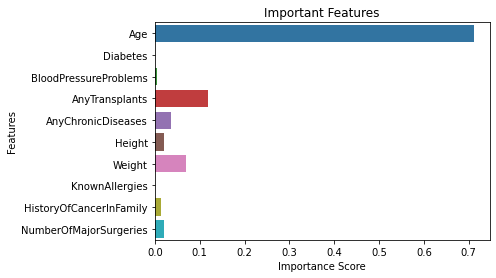

In [48]:
#Using the Feature importance to Extract the Importance of the Features.
feature_imp = Lr_model.feature_importances_
sns.barplot(x=feature_imp, y=X.columns)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title("Important Features")
plt.show();

### Identify Important factors that determine Premium Prices.

As we can see in the above plot we observe that.

* Age is the most important Factor followed by AnyTransplant, Weight and other.
* KnownAllergies,Diabetes, BloodPressureProblems are the least important Factor in determining the Premium Price.
* We can get better and more forcing results if we had more data for our Analysis.


## Saving the model

In [49]:
import pickle

pickle_out = open("classifier.pkl", mode = "wb")
pickle.dump(Lr_model, pickle_out)
pickle_out.close()

Test Prediction for a Sample Data Point

In [50]:
premium_price = {
    'Age':45,
'AnyTransplants':1,
'AnyChronicDiseases':0,
'Weight':56,
'Height':155,
'HistoryOfCancerInFamily':0,
'NumberOfMajorSurgeries':1,
'KnownAllergies':0,
'BloodPressureProblems':1,
'Diabetes':0
}

In [51]:
model_pickle = open("classifier.pkl", 'rb')
clf = pickle.load(model_pickle)

In [52]:
# defining the function which will make the prediction using the data which the user inputs

from flask import Flask, request, jsonify

app = Flask(__name__)

@app.route('/predict', methods = ['POST'])
def prediction(prem_price):
  print(prem_price)
  Age = prem_price['Age']
  print(Age)
  AnyTransplants = prem_price['AnyTransplants']
  AnyChronicDiseases = prem_price['AnyChronicDiseases']
  Weight = prem_price['Weight']
  Height = prem_price['Height']
  HistoryOfCancerInFamily = prem_price['HistoryOfCancerInFamily']
  NumberOfMajorSurgeries = prem_price['NumberOfMajorSurgeries']
  KnownAllergies = prem_price['KnownAllergies']
  BloodPressureProblems = prem_price['BloodPressureProblems']
  Diabetes= prem_price['Diabetes']

  # Making predictions
  prediction = round(clf.predict(
        [[Age, AnyTransplants, AnyChronicDiseases, Weight,Height, HistoryOfCancerInFamily,NumberOfMajorSurgeries,
          KnownAllergies,BloodPressureProblems,Diabetes]])[0],2)
  print(prediction)
  return {"Premium Price":prediction}

In [53]:
prediction(premium_price)

{'Age': 45, 'AnyTransplants': 1, 'AnyChronicDiseases': 0, 'Weight': 56, 'Height': 155, 'HistoryOfCancerInFamily': 0, 'NumberOfMajorSurgeries': 1, 'KnownAllergies': 0, 'BloodPressureProblems': 1, 'Diabetes': 0}
45
35964.82


{'Premium Price': 35964.82}